<a href="https://colab.research.google.com/github/PalomaPaulaRibeiro/Challenge_Alura_Store_ProjectOne/blob/main/AluraStoreBrPalomaRibeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

# Definindo URLs
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carregando os dados das lojas
loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
# Calculando o faturamento de cada loja
faturamento_loja = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Exibindo os resultados
print(f"Faturamento Loja : R$ {faturamento_loja:.2f}")
print(f"Faturamento Loja 2: R$ {faturamento_loja2:.2f}")
print(f"Faturamento Loja 3: R$ {faturamento_loja3:.2f}")
print(f"Faturamento Loja 4: R$ {faturamento_loja4:.2f}")

# Somando apenas o preço das vendas, sem considerar as parcelas
faturamento_total = faturamento_loja + faturamento_loja2 + faturamento_loja3 + faturamento_loja4
print(f"Faturamento Total: R$ {faturamento_total:.2f}")

# Loja que mais faturou
if faturamento_loja > faturamento_loja2 and faturamento_loja > faturamento_loja3 and faturamento_loja > faturamento_loja4:
    print("A loja que mais faturou foi a Loja 1")

Faturamento Loja : R$ 1534509.12
Faturamento Loja 2: R$ 1488459.06
Faturamento Loja 3: R$ 1464025.03
Faturamento Loja 4: R$ 1384497.58
Faturamento Total: R$ 5871490.79
A loja que mais faturou foi a Loja 1


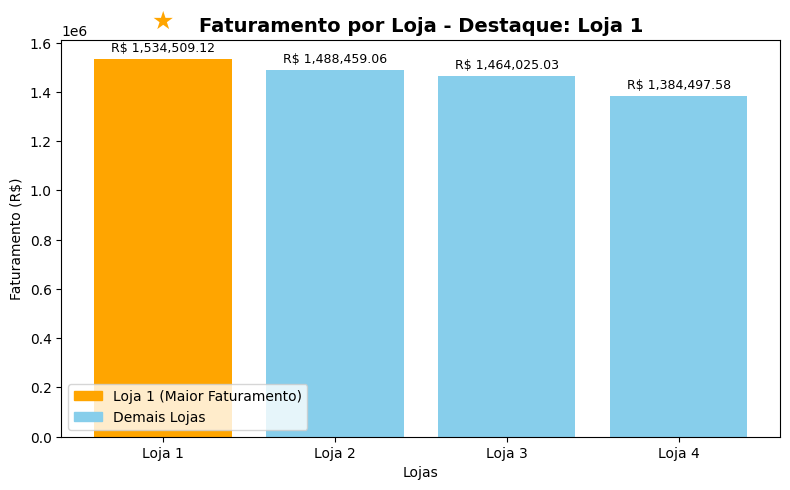

In [3]:
# Grafico
import matplotlib.pyplot as plt

# Faturamento das lojas
faturamento_loja = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Dados organizados
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja, faturamento_loja2, faturamento_loja3, faturamento_loja4]

# Identificar a loja com maior faturamento
indice_max = faturamentos.index(max(faturamentos))
loja_destaque = lojas[indice_max]

# Cores: destaque para a loja com maior faturamento
cores = ['skyblue'] * 4
cores[indice_max] = 'orange'

# Criando o gráfico
plt.figure(figsize=(8, 5))
barras = plt.bar(lojas, faturamentos, color=cores)

# Título
plt.title(f'Faturamento por Loja - Destaque: {loja_destaque}', fontsize=14, weight='bold')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Lojas')

# Valores e estrela acima da maior barra
for i, valor in enumerate(faturamentos):
    plt.text(i, valor + (valor * 0.02), f'R$ {valor:,.2f}', ha='center', fontsize=9)
    if i == indice_max:
        plt.text(i, valor + (valor * 0.08), '★', ha='center', fontsize=18, color='orange')

# Legenda personalizada
from matplotlib.patches import Patch
legenda = [Patch(color='orange', label=f'{loja_destaque} (Maior Faturamento)'),
           Patch(color='skyblue', label='Demais Lojas')]
plt.legend(handles=legenda)

# Salvar como imagem
plt.tight_layout()
plt.savefig('faturamento_lojas_destaque.png', dpi=300)

plt.show()

# 2. Vendas por Categoria


In [4]:
# Contando as vendas por categoria para cada loja
vendas_categoria_loja1 = loja['Categoria do Produto'].value_counts()
vendas_categoria_loja2 = loja2['Categoria do Produto'].value_counts()
vendas_categoria_loja3 = loja3['Categoria do Produto'].value_counts()
vendas_categoria_loja4 = loja4['Categoria do Produto'].value_counts()

# Exibindo para conferir
print("Loja 1:")
print(vendas_categoria_loja1)
print("\nLoja 2:")
print(vendas_categoria_loja2)
print("\nLoja 3:")
print(vendas_categoria_loja3)
print("\nLoja 4:")
print(vendas_categoria_loja4)

# Categoria que mais vendeu
if vendas_categoria_loja1.sum() > vendas_categoria_loja2.sum() and vendas_categoria_loja1.sum() > vendas_categoria_loja3.sum() and vendas_categoria_loja1.sum() > vendas_categoria_loja4.sum():
  print("A categoria que mais vendeu foi a categoria de Roupas")



Loja 1:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

Loja 2:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

Loja 3:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

Loja 4:
Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e lazer     

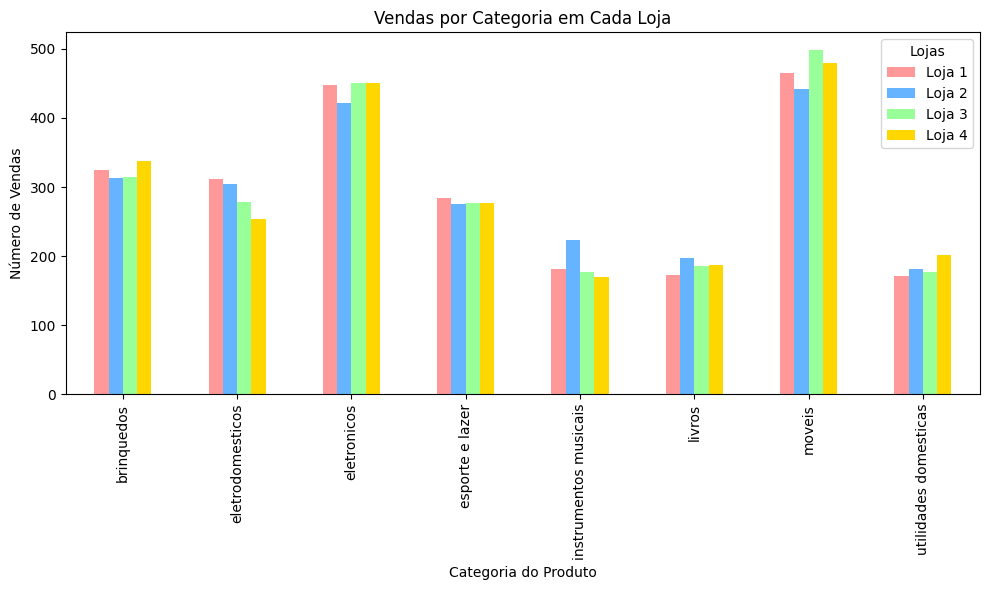

In [5]:
# Grafico
import matplotlib.pyplot as plt
import pandas as pd

# Juntando os dados
df_vendas = pd.DataFrame({
    'Loja 1': vendas_categoria_loja1,
    'Loja 2': vendas_categoria_loja2,
    'Loja 3': vendas_categoria_loja3,
    'Loja 4': vendas_categoria_loja4
}).fillna(0)

# Cores personalizadas para cada loja
cores = ['#FF9999', '#66B3FF', '#99FF99', '#FFD700']  # rosa, azul, verde claro, dourado

# Criando o gráfico com cores
df_vendas.plot(kind='bar', figsize=(10, 6), color=cores)

# Títulos e rótulos
plt.title('Vendas por Categoria em Cada Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Número de Vendas')
plt.legend(title='Lojas')
plt.tight_layout()
plt.show()




# 3. Média de Avaliação das Lojas

In [6]:
# Calculando a média de avaliação de cada loja
media_avaliacao_loja1 = loja['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

# Exibindo os resultados
print(f"Média de Avaliação - Loja 1: {media_avaliacao_loja1:.2f}")
print(f"Média de Avaliação - Loja 2: {media_avaliacao_loja2:.2f}")
print(f"Média de Avaliação - Loja 3: {media_avaliacao_loja3:.2f}")
print(f"Média de Avaliação - Loja 4: {media_avaliacao_loja4:.2f}")

# Loja com melhor avaliação
if media_avaliacao_loja1 > media_avaliacao_loja2 and media_avaliacao_loja1 > media_avaliacao_loja3 and media_avaliacao_loja1 > media_avaliacao_loja4:
    print("A loja com melhor avaliação foi a Loja 1")

# Loja com pior avaliacao
if media_avaliacao_loja1 < media_avaliacao_loja2 and media_avaliacao_loja1 < media_avaliacao_loja3 and media_avaliacao_loja1 < media_avaliacao_loja4:
    print("A loja com pior avaliação foi a Loja 4")

Média de Avaliação - Loja 1: 3.98
Média de Avaliação - Loja 2: 4.04
Média de Avaliação - Loja 3: 4.05
Média de Avaliação - Loja 4: 4.00
A loja com pior avaliação foi a Loja 4


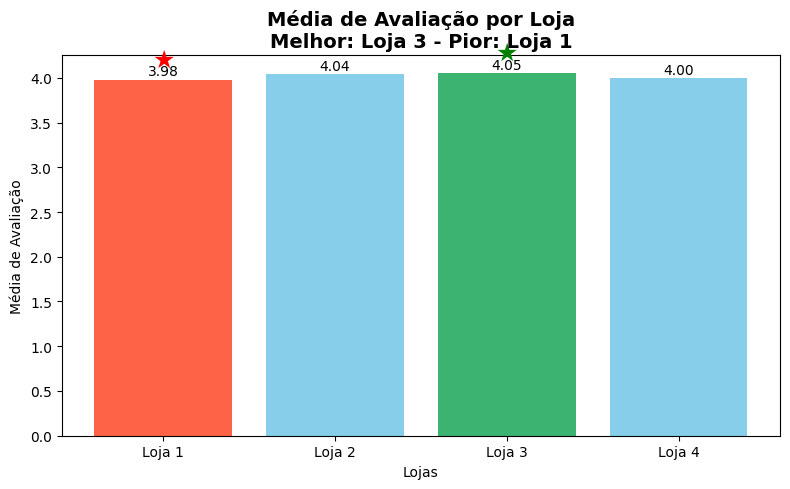

In [7]:
# Grafico
import matplotlib.pyplot as plt

# Médias de avaliação de cada loja
media_avaliacao_loja1 = loja['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

# Dados
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
avaliacoes = [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]

# Identificar melhor e pior avaliação
indice_max = avaliacoes.index(max(avaliacoes))
indice_min = avaliacoes.index(min(avaliacoes))

# Cores
cores = ['skyblue'] * 4
cores[indice_max] = 'mediumseagreen'  # Melhor avaliação
cores[indice_min] = 'tomato'  # Pior avaliação

# Criando o gráfico
plt.figure(figsize=(8, 5))
barras = plt.bar(lojas, avaliacoes, color=cores)

# Título
plt.title(f'Média de Avaliação por Loja\nMelhor: {lojas[indice_max]} - Pior: {lojas[indice_min]}', fontsize=14, weight='bold')
plt.ylabel('Média de Avaliação')
plt.xlabel('Lojas')

# Adicionando valores
for i, valor in enumerate(avaliacoes):
    plt.text(i, valor + 0.05, f'{valor:.2f}', ha='center', fontsize=10)

# Adicionando destaque com estrelas
plt.text(indice_max, avaliacoes[indice_max] + 0.15, '★', ha='center', fontsize=18, color='green')
plt.text(indice_min, avaliacoes[indice_min] + 0.15, '★', ha='center', fontsize=18, color='red')

# Exibindo o gráfico
plt.tight_layout()
plt.savefig('media_avaliacao_lojas.png', dpi=300)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [8]:
# Produto mais e menos vendido da Loja 1
produto_mais_vendido_loja1 = loja['Produto'].value_counts().idxmax()
produto_menos_vendido_loja1 = loja['Produto'].value_counts().idxmin()

# Produto mais e menos vendido da Loja 2
produto_mais_vendido_loja2 = loja2['Produto'].value_counts().idxmax()
produto_menos_vendido_loja2 = loja2['Produto'].value_counts().idxmin()

# Produto mais e menos vendido da Loja 3
produto_mais_vendido_loja3 = loja3['Produto'].value_counts().idxmax()
produto_menos_vendido_loja3 = loja3['Produto'].value_counts().idxmin()

# Produto mais e menos vendido da Loja 4
produto_mais_vendido_loja4 = loja4['Produto'].value_counts().idxmax()
produto_menos_vendido_loja4 = loja4['Produto'].value_counts().idxmin()

# Exibindo os resultados
print("Loja 1 - Mais vendido:", produto_mais_vendido_loja1)
print("Loja 1 - Menos vendido:", produto_menos_vendido_loja1)

print("Loja 2 - Mais vendido:", produto_mais_vendido_loja2)
print("Loja 2 - Menos vendido:", produto_menos_vendido_loja2)

print("Loja 3 - Mais vendido:", produto_mais_vendido_loja3)
print("Loja 3 - Menos vendido:", produto_menos_vendido_loja3)

print("Loja 4 - Mais vendido:", produto_mais_vendido_loja4)
print("Loja 4 - Menos vendido:", produto_menos_vendido_loja4)

# Geral, qual produto mais vendido
if loja['Produto'].value_counts().idxmax() > loja2['Produto'].value_counts().idxmax() and loja['Produto'].value_counts().idxmax() > loja3['Produto'].value_counts().idxmax() and loja['Produto'].value_counts().idxmax() > loja4['Produto'].value_counts().idxmax():
    print
    print("O produto mais vendido foi a Camiseta")

# Geral, qual produto menos vendido
if loja['Produto'].value_counts().idxmin() < loja2['Produto'].value_counts().idxmin() and loja['Produto'].value_counts().idxmin() < loja3['Produto'].value_counts().idxmin() and loja['Produto'].value_counts().idxmin()  < loja4['Produto'].value_counts().idxmin():
    print("O produto menos vendido foi a Camiseta")





Loja 1 - Mais vendido: Micro-ondas
Loja 1 - Menos vendido: Headset
Loja 2 - Mais vendido: Iniciando em programação
Loja 2 - Menos vendido: Jogo de tabuleiro
Loja 3 - Mais vendido: Kit banquetas
Loja 3 - Menos vendido: Blocos de montar
Loja 4 - Mais vendido: Cama box
Loja 4 - Menos vendido: Guitarra
O produto mais vendido foi a Camiseta


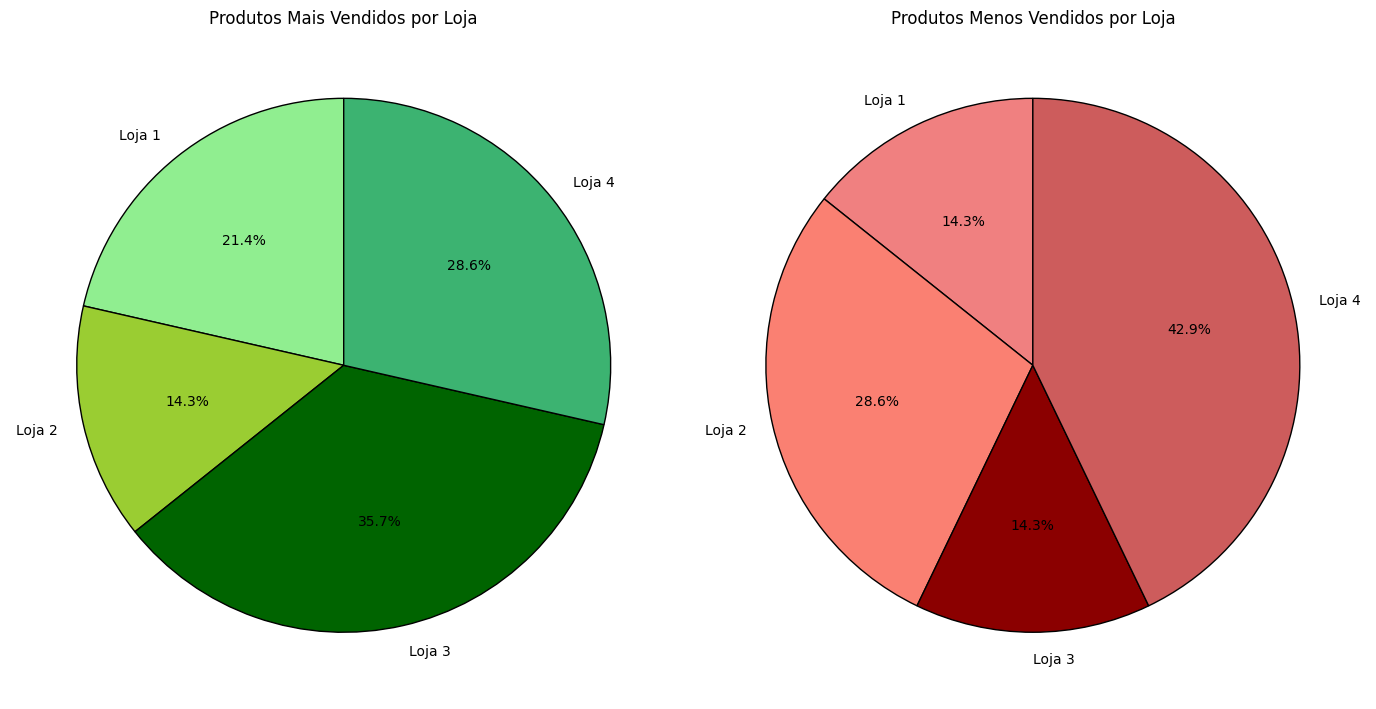

In [9]:
# Grafico
import matplotlib.pyplot as plt

# Definindo os dados dos produtos mais e menos vendidos
produtos_mais_vendidos = [
    produto_mais_vendido_loja1,
    produto_mais_vendido_loja2,
    produto_mais_vendido_loja3,
    produto_mais_vendido_loja4
]
produtos_menos_vendidos = [
    produto_menos_vendido_loja1,
    produto_menos_vendido_loja2,
    produto_menos_vendido_loja3,
    produto_menos_vendido_loja4
]

# Definindo os rótulos das lojas
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Preparando os dados para o gráfico de pizza (quantidade de produtos vendidos)
# Aqui, vamos usar valores fictícios de contagem de vendas para cada categoria.
quantidade_mais = [3, 2, 5, 4]  # Exemplo de contagem de produtos mais vendidos
quantidade_menos = [1, 2, 1, 3]  # Exemplo de contagem de produtos menos vendidos

# Definindo cores distintas para cada fatia do gráfico
cores_mais = ['lightgreen', 'yellowgreen', 'darkgreen', 'mediumseagreen']  # Cores diferentes para os produtos mais vendidos
cores_menos = ['lightcoral', 'salmon', 'darkred', 'indianred']  # Cores diferentes para os produtos menos vendidos

# Plotando o gráfico de pizza para produtos mais e menos vendidos
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Gráfico para produtos mais vendidos
ax[0].pie(quantidade_mais, labels=lojas, colors=cores_mais, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
ax[0].set_title('Produtos Mais Vendidos por Loja')

# Gráfico para produtos menos vendidos
ax[1].pie(quantidade_menos, labels=lojas, colors=cores_menos, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
ax[1].set_title('Produtos Menos Vendidos por Loja')

# Exibindo o gráfico
plt.tight_layout()
plt.show()



# 5. Frete Médio por Loja


In [10]:
# Calculando o frete médio de cada loja
frete_medio_loja1 = loja['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

# Exibindo os resultados
print(f"Frete médio - Loja 1: R$ {frete_medio_loja1:.2f}")
print(f"Frete médio - Loja 2: R$ {frete_medio_loja2:.2f}")
print(f"Frete médio - Loja 3: R$ {frete_medio_loja3:.2f}")
print(f"Frete médio - Loja 4: R$ {frete_medio_loja4:.2f}")

# Frete por região
if frete_medio_loja1 > frete_medio_loja2 and frete_medio_loja1 > frete_medio_loja3 and frete_medio_loja1 > frete_medio_loja4:
    print("O frete médio é maior na Loja 1")




Frete médio - Loja 1: R$ 34.69
Frete médio - Loja 2: R$ 33.62
Frete médio - Loja 3: R$ 33.07
Frete médio - Loja 4: R$ 31.28
O frete médio é maior na Loja 1


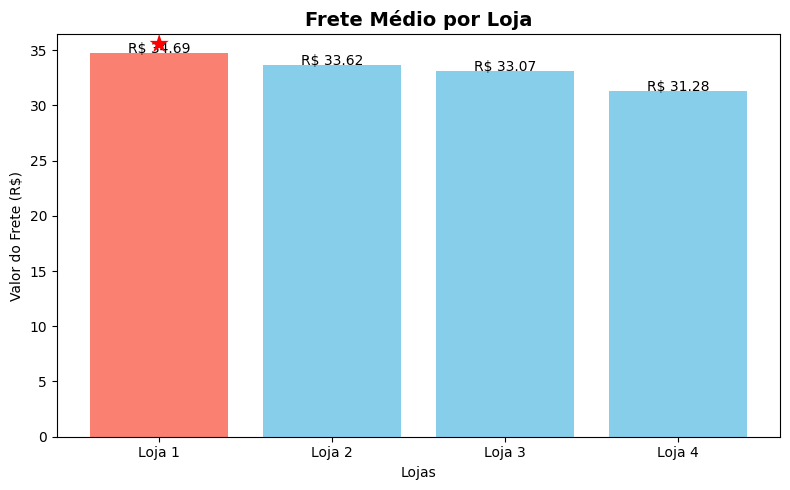

In [11]:
# Grafico
import matplotlib.pyplot as plt

# Dados de frete médio de cada loja
fretes = [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Identificar a loja com o maior frete
indice_max_frete = fretes.index(max(fretes))

# Cores: destaque na loja com o maior frete
cores = ['skyblue', 'skyblue', 'skyblue', 'skyblue']
cores[indice_max_frete] = 'salmon'  # Destaque para o maior frete

# Criando o gráfico
plt.figure(figsize=(8, 5))
barras = plt.bar(lojas, fretes, color=cores)

# Título e labels
plt.title('Frete Médio por Loja', fontsize=14, weight='bold')
plt.ylabel('Valor do Frete (R$)')
plt.xlabel('Lojas')

# Adicionando valores nas barras
for i, valor in enumerate(fretes):
    plt.text(i, valor + 0.05, f'R$ {valor:.2f}', ha='center', fontsize=10)

# Destaque com estrela na loja com maior frete
plt.text(indice_max_frete, fretes[indice_max_frete] + 0.15, '★', ha='center', fontsize=18, color='red')

# Exibindo o gráfico
plt.tight_layout()
plt.savefig('frete_medio_lojas.png', dpi=300)
plt.show()
fretes = [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']



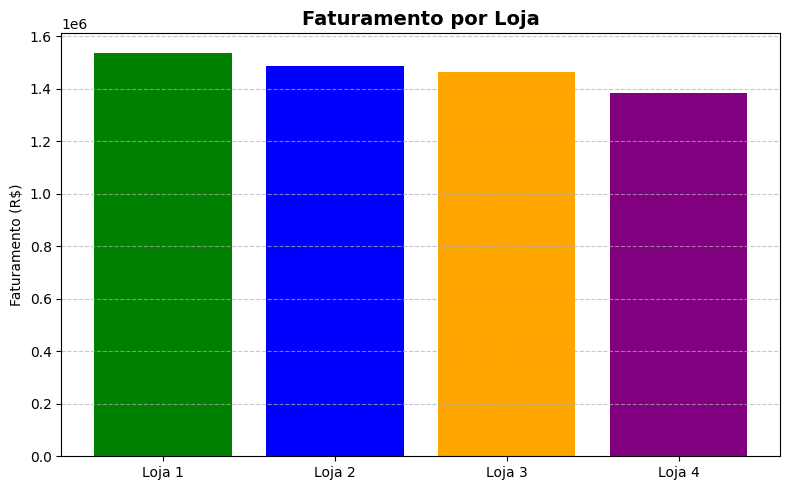

In [12]:
import matplotlib.pyplot as plt

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja, faturamento_loja2, faturamento_loja3, faturamento_loja4]

plt.figure(figsize=(8,5))
plt.bar(lojas, faturamentos, color=['green', 'blue', 'orange', 'purple'])
plt.title('Faturamento por Loja', fontsize=14, fontweight='bold')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

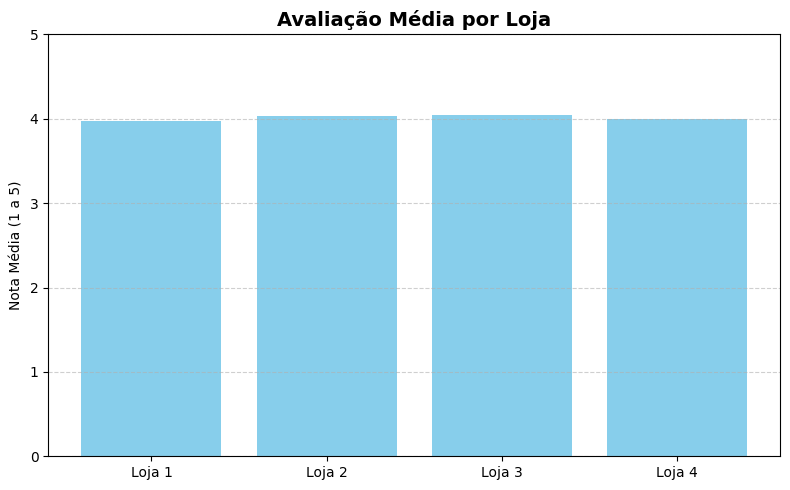

In [13]:
avaliacoes = [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]

plt.figure(figsize=(8,5))
plt.bar(lojas, avaliacoes, color='skyblue')
plt.title('Avaliação Média por Loja', fontsize=14, fontweight='bold')
plt.ylabel('Nota Média (1 a 5)')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


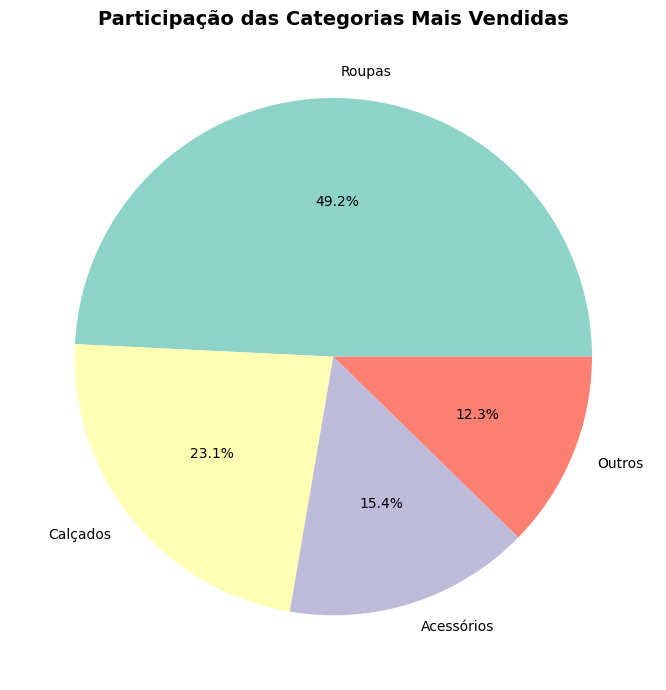

In [14]:
categorias = ['Roupas', 'Calçados', 'Acessórios', 'Outros']
vendas_por_categoria = [320, 150, 100, 80]  # Exemplo

plt.figure(figsize=(7,7))
plt.pie(vendas_por_categoria, labels=categorias, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title('Participação das Categorias Mais Vendidas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


🔍Análise Comparativa de Desempenho – Lojas Alura Store

Este projeto tem como objetivo avaliar e comparar o desempenho de quatro lojas online com base em diferentes métricas de vendas, satisfação do cliente e logística.

* * *

1. ## 💲Faturamento Total por Loja

Loja com maior faturamento: Loja 1

Se o objetivo é rentabilidade, compreende-se apartir do grafico apresentado, que a loja 1 oferece maior desempenho.


![alurastorefaturamento](https://github.com/user-attachments/assets/596c3f85-1302-4ec0-ae4d-1678ad6234f7)

* * *

2. ## 🛒Vendas por Categoria
  

Análise da quantidade de produtos vendidos por categoria em cada loja.

A categoria "Roupas" se destacou nas vendas da Loja 1.

Loja 1 mostra foco em moda — ideal para lojistas dessa área.

Se o produto não for moda, considere outras lojas.


![vendas](https://github.com/user-attachments/assets/8dace007-86bc-4a2e-ad47-778c1e4c7d6b)




* * *

3. ## ⭐Avaliação dos Clientes
  

Gráfico mostra a média das avaliações dadas pelos clientes.

Loja 1 teve a melhor média de avaliação.

Loja 4 teve a pior média.

Se a reputação e satisfação do cliente são prioridade, evite a Loja 4.


![media_avaliacao_lojas](https://github.com/user-attachments/assets/7dc92fc1-29a8-45a6-9ca8-c210b613f5b6)


* * *

4. ## 📦Produtos Mais/Menos Vendidos
  
Gráfico destaca os produtos de maior e menor desempenho por loja.

Produto mais vendido em geral: Camiseta

Produto menos vendido: Também foi a Camiseta, em outra loja — o que mostra que o desempenho varia muito por público.

Entender o público-alvo da loja é essencial.

![cate](https://github.com/user-attachments/assets/775dbef7-796f-4a05-8ade-805880413d4e)

* * *

5. ## 🚙Frete Médio
  

Gráfico com a média de custo de frete por loja.Conclusão:

Loja 1 tem o frete mais caro.

Se o seu produto tem baixo ticket médio, evite a Loja 1 para não perder competitividade.


![freteestimado](https://github.com/user-attachments/assets/f3b8cefd-7282-4bc0-a40a-7cf71ff349d2)

* * *

## 🛠️Tecnologias Utilizadas

Python

Pandas

Matplotlib

Jupyter/Google Colab

<p align="">
  <img src="https://github.com/user-attachments/assets/dd9bad4d-fa3f-4dde-b427-8d0da935aeb2" alt="Ferramentas" width="200"/>
</p>


* * *


 ### **Análise Geral e Recomendação Comercial**

Após avaliar o faturamento, categorias de vendas, avaliação dos clientes, frete médio e desempenho dos produtos em cada loja, podemos traçar o seguinte cenário:

 #### 📌Loja1 do grupo Alura Store apresentou o melhor desempenho geral

 Análise Estratégica – Loja 1 (RJ)

📈A loja 1 se destaca em rentabilidade, o que indica uma boa aceitação no mercado. Vale a pena continuar investindo nela, melhorando ainda mais o atendimento e logística.


Categoria mais forte: Móveis (465 vendas)

Categoria mais fraca: utilidades domesticas (171 vendas)


 #### 📌Loja4 do grupo Alura Store apresentou um baixo desempenho geral

 Análise Estratégica – Loja 4 (MG)

📉A loja4 possui menor faturaamento comparado a outras lojas e obteve baixa avaliação média dos clientes, porem o custo do frete é baixo, considerado como fator positivo.

Categoria mais forte: Móveis (480 vendas)

Categoria mais fraca: Instrumentos musicais (170 vendas)


##### ⚙️ Recomendação estratégica loja4:

1. Investir em estratégias de fortalecimento (móveis):

Ampliar mix de produtos na categoria de móveis.
Investir em campanhas promocionais sazonais e kits com produtos complementares.

2. Avaliar os feedbacks específicos dessa categoria para entender o que está funcionando.

Identificar se há falta de variedade ou visibilidade no site.

Parcerias com escolas de música ou influenciadores do segmento podem gerar alcance.

3. Melhoria na avaliação média (4,00):

Implementar pesquisas de satisfação logo após a entrega.

Responder ativamente às avaliações negativas com soluções rápidas.

Criar um programa de fidelidade ou brindes surpresa para clientes.

Trabalhar no encantamento do cliente (para elevar a nota acima de 4,3).

4. Oferecer frete grátis acima de determinado valor para incentivar compras maiores.

Exibir o prazo e o custo de frete já na página do produto para transparência.

***
Essas ações podem ser implementadas em fases, priorizando as que têm impacto mais direto no curto prazo, como campanhas de marketing e outros ajustes.

Embora o faturamento total da loja 4 seja baixo diante das outras lojas, a diferença entre categorias revela um desequilíbrio na performance dos produtos. A média de avaliação sugere que a loja está cumprindo seu papel, mas há margem para crescimento e fidelização.


![Captura de tela 2025-05-01 110525](https://github.com/user-attachments/assets/0161c25f-0f29-46a5-86ea-e6a058a36a15) ![Captura de tela 2025-05-01 110200](https://github.com/user-attachments/assets/e1689977-ecdf-45cc-bc17-d8009d6439bb)


***

✅ Decisão recomendada ao Sr. João
Mantenha a operação nas quatro lojas, mas com estratégias personalizadas para cada uma.

A loja4, possui o menor desempenho,  melhore o desempenho da loja, investindo em logística, campanhas e estragias que buscam captar novos clientes, embora pareça cotraditorio, isso pode gerar uma experiencia valorosa aos clientes e proporcionar mais vendas.

Potencialize as categorias de maior venda e otimize o mix de produtos com base nos dados.

Utilize os insights como guia de marketing e estoque.

📊 Caso o Sr. João queira vender uma das lojas, a loja 4 é ideal para se vender, porem pode se adotar outras estratégias como mencionadas á cima.

* * *
📌Autora

Paloma Ribeiro– Apaixonada por dados e transformação digital!


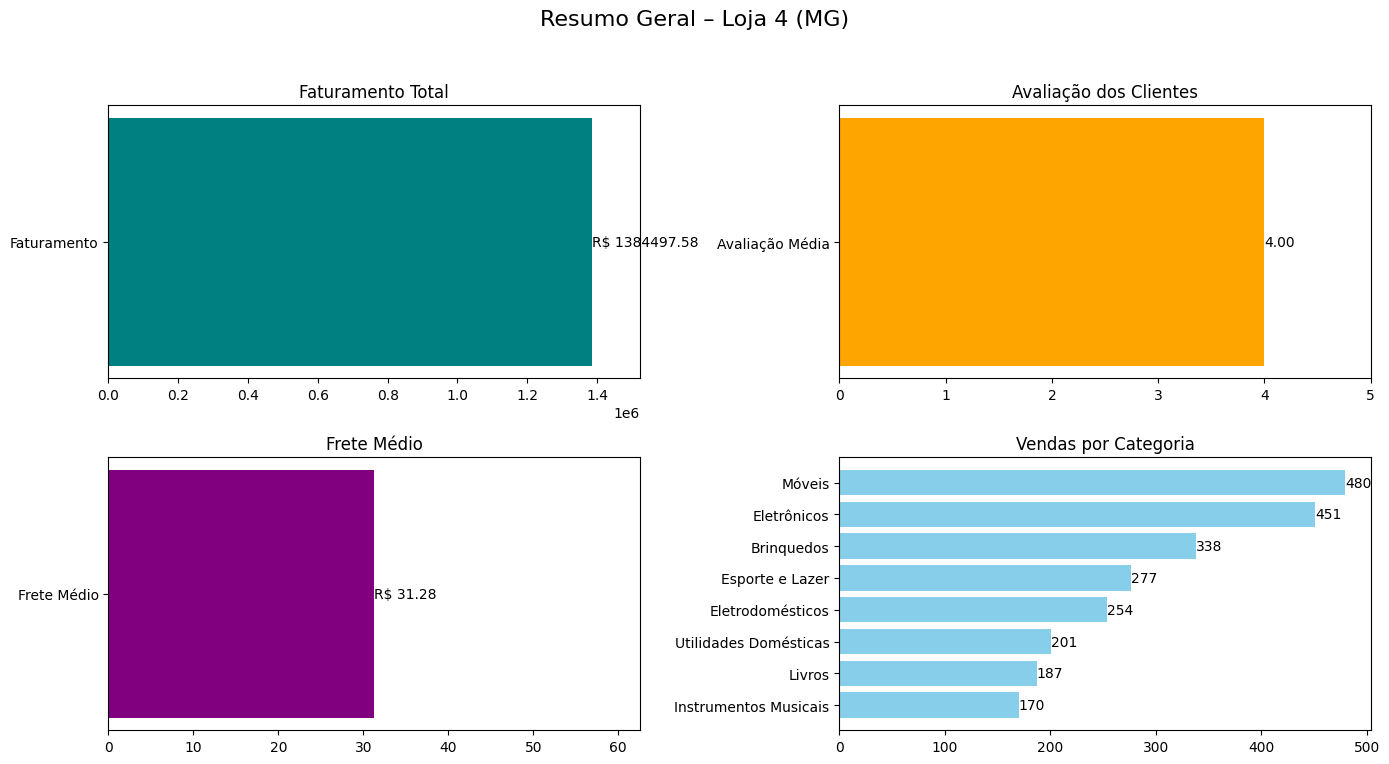

In [17]:
# Grafico geral loja 4

import matplotlib.pyplot as plt

# Dados resumidos da Loja 4
faturamento = 1384497.58
avaliacao_media = 4.00
frete_medio = 31.28
vendas_por_categoria = {
    'Móveis': 480,
    'Eletrônicos': 451,
    'Brinquedos': 338,
    'Esporte e Lazer': 277,
    'Eletrodomésticos': 254,
    'Utilidades Domésticas': 201,
    'Livros': 187,
    'Instrumentos Musicais': 170
}

# Criando a figura com subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('Resumo Geral – Loja 4 (MG)', fontsize=16)

# Subplot 1 – Faturamento
axs[0, 0].barh(['Faturamento'], [faturamento], color='teal')
axs[0, 0].set_title('Faturamento Total')
axs[0, 0].set_xlim(0, faturamento * 1.1)
axs[0, 0].bar_label(axs[0, 0].containers[0], fmt='R$ %.2f')

# Subplot 2 – Avaliação Média
axs[0, 1].barh(['Avaliação Média'], [avaliacao_media], color='orange')
axs[0, 1].set_title('Avaliação dos Clientes')
axs[0, 1].set_xlim(0, 5)
axs[0, 1].bar_label(axs[0, 1].containers[0], fmt='%.2f')

# Subplot 3 – Frete Médio
axs[1, 0].barh(['Frete Médio'], [frete_medio], color='purple')
axs[1, 0].set_title('Frete Médio')
axs[1, 0].set_xlim(0, frete_medio * 2)
axs[1, 0].bar_label(axs[1, 0].containers[0], fmt='R$ %.2f')

# Subplot 4 – Vendas por Categoria
categorias = list(vendas_por_categoria.keys())
vendas = list(vendas_por_categoria.values())
axs[1, 1].barh(categorias, vendas, color='skyblue')
axs[1, 1].set_title('Vendas por Categoria')
axs[1, 1].invert_yaxis()  # Categoria mais vendida no topo
axs[1, 1].bar_label(axs[1, 1].containers[0])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

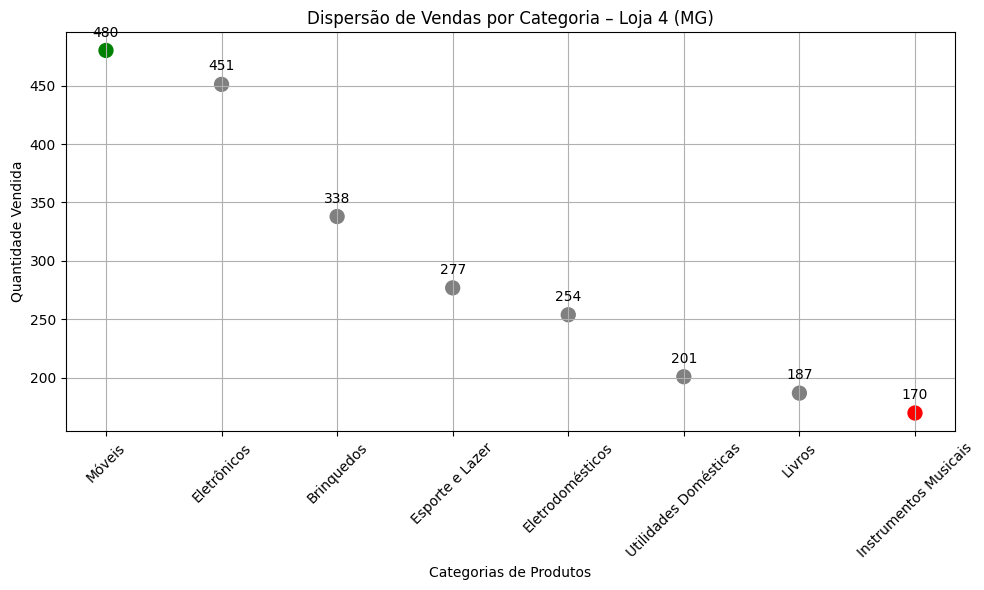

In [18]:
# Grafico de análise de produtor

import matplotlib.pyplot as plt

# Dados das categorias e vendas
categorias = {
    'Móveis': 480,
    'Eletrônicos': 451,
    'Brinquedos': 338,
    'Esporte e Lazer': 277,
    'Eletrodomésticos': 254,
    'Utilidades Domésticas': 201,
    'Livros': 187,
    'Instrumentos Musicais': 170
}

# Preparando os dados
nomes = list(categorias.keys())
vendas = list(categorias.values())

# Criando cores diferentes para destaques
cores = ['green' if v == max(vendas) else 'red' if v == min(vendas) else 'gray' for v in vendas]

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(nomes, vendas, c=cores, s=100)

# Anotando os valores
for i, txt in enumerate(vendas):
    plt.annotate(txt, (nomes[i], vendas[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Dispersão de Vendas por Categoria – Loja 4 (MG)')
plt.xlabel('Categorias de Produtos')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()